<a href="https://colab.research.google.com/github/smurciap/Proyecto-grupo-6/blob/main/graficaE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


def experimental(a,b):
  c=[]
  ci=[]
  for i in range(1,len(a)):
    thetap=(a[i]-a[i-1])/(b[i]-b[i-1])
    c.append(thetap)
  c=np.array(c)
  for j in range(1,len(b)):
    ci.append(b[j])
  return (c,ci)

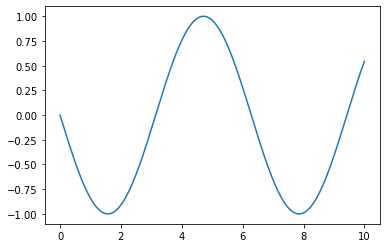

In [ ]:
a=np.linspace(0,10,1000)
b=np.sin(a)
delta=10**(-5)
a1=[]
for i in range(1000):
  f2=(np.sin(a[i]+delta)+np.sin(a[i]-delta)-2*np.sin(a[i]))/(delta**2)
  a1.append(f2)
a1=np.array(a1)
plt.plot(a,a1)

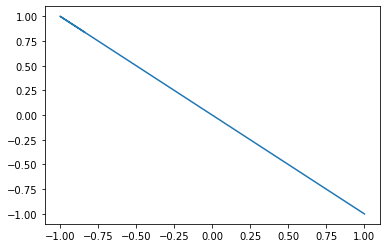

In [ ]:
theta=np.cos(a)
theta2=-np.cos(a)
plt.plot(theta,theta2)

In [ ]:
def estadistica(X,Y):
  mediaX=sum(X)/len(X)
  mediaY=sum(Y)/len(Y)
  suma=0
  for i in range(len(X)):
    suma=suma+(X[i]-mediaX)*(Y[i]-mediaY)
  cov=(suma)/(len(X)-1)
  sumai=0
  for i in range(len(X)):
    sumai=sumai+(X[i]-mediaX)**2
  sx=math.sqrt(sumai/(len(X)-1))
  sumai=0
  for j in range(len(Y)):
    sumai=sumai+(Y[i]-mediaY)**2
  sy=math.sqrt(sumai/(len(Y)-1))
  R=cov/(sx*sy)
  m=cov/sx**2
  b=mediaY-m*mediaX
  b1=m*a+b
  c=Y-b1
  suma=0
  for i in range(len(c)):
    suma=suma+c[i]**2
  SR=suma/(len(c)-2)
  errorm=math.sqrt(SR/((len(X)-1)*sx**2))
  errorb=math.sqrt(SR*((1/len(X))+(mediaX**2/((len(X)-1)*(sx**2)))))
  return (cov,mediaX, mediaY,R**2,m,b,errorm, errorb,SR)
estadistica(theta,theta2)

(-0.520727909909351,
 -0.054266790936897964,
 0.054266790936897964,
 0.8446039555883125,
 -0.9999999999999998,
 1.3877787807814457e-17,
 0.26088851978398603,
 0.1886987143924383,
 35.406767663725724)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

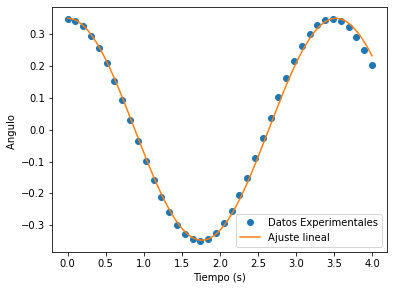

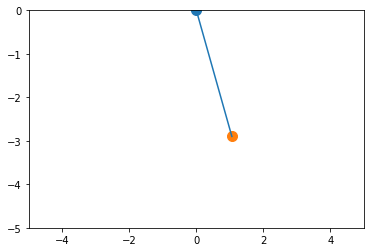

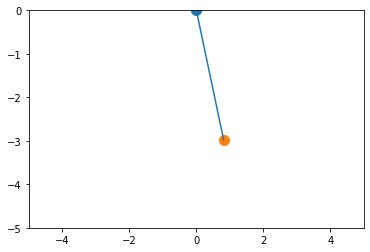

In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
class experimento():
  def __init__(self,X,Y):
    self.abscisa=X
    self.ordenada=Y
  def derivar(self):
    YP=[]
    for i in range(len(self.ordenada)-1):
      yp=(self.ordenada[i+1]-self.ordenada[i])/(self.abscisa[i+1]-self.abscisa[i])
      YP.append(yp)
    YP=np.array(YP)
    XP=[]
    for j in range(len(self.abscisa)-1):
      xp=self.abscisa[j]
      XP.append(xp)
    XP=np.array(XP)
    return (XP,YP)
  def derivar2(self):
    k=experimento(self.abscisa,self.ordenada)
    x1,y1=k.derivar()
    YP=[]
    for i in range(len(y1)-1):
      yp=(y1[i+1]-y1[i])/(x1[i+1]-x1[i])
      YP.append(yp)
    YP=np.array(YP)
    XP=[]
    for j in range(len(x1)-1):
      xp=x1[j]
      XP.append(xp)
    XP=np.array(XP)
    return (XP,YP)
  def estadistica(self):
    k=experimento(self.abscisa,self.ordenada)
    x1,y1=k.derivar2()
    Y0=[]
    for i in range(len(self.ordenada)-2):
      y0=self.ordenada[i]
      Y0.append(y0)
    Y0=np.array(Y0)
    return (Y0,y1)
  def cov(self):
    k=experimento(self.abscisa,self.ordenada)
    y0,y1=k.estadistica()
    mediaY0=sum(y0)/len(y0)
    mediaY1=sum(y1)/len(y1)
    cov=0
    for i in range(len(y1)):
      cov=cov+(y0[i]-mediaY0)*(y1[i]-mediaY1)
    cov=cov/(len(y1)-1)
    return (y0,y1,mediaY0,mediaY1,cov)
  def ecuacion(self):
     k=experimento(self.abscisa,self.ordenada)
     y0,y1,mediaY0,mediaY1,cov=k.cov() 
     sx=0
     p=len(y0)
     for i in range(len(y0)):
       sx=sx+(y0[i]-mediaY0)**2
     sx=(sx/(len(y0)-1)) 
     sy=0
     for i in range(len(y0)):
       sy=sy+(y1[i]-mediaY1)**2
     sy=(sy/(len(y0)-1)) 
     m=cov/(sx)
     b=mediaY1-m*mediaY0
     return (m,b,sx,y0,y1,sx,mediaY0)
  def error(self):
    k=experimento(self.abscisa,self.ordenada)
    m,b,sx,y0,y1,sx,mediaY0=k.ecuacion()
    e=[]
    for i in range(len(y0)):
      e.append(y1[i]-(m*y0[i]+b))
    SR=0
    for i in range(len(e)):
      SR=SR+e[i]**2
    SR=SR/(len(e)-2)
    errorm=math.sqrt(SR/((len(e)-1)*sx))
    errorb=math.sqrt(SR*((1/len(e))+((mediaY0**2)/((len(e)-1)*sx))))
    return (m,b,errorm,errorb)
  def mostrar(self):
    k=experimento(self.abscisa,self.ordenada)
    m,b,errorm,errorb=k.error()
    print("La ecuación diferencial asociada es: x''=","(",m,"+/-",errorm,")x + (",b,"+/-",errorb,")")
  def solucion(self):
    k=experimento(self.abscisa,self.ordenada)
    m,b,errorm,errorb=k.error()
    errorl=(b/-m)*((errorb/b)+(errorm/-m))
    l=-b/m
    erroromega=math.sqrt(-m)*(errorm/2*(-m))
    omega=math.sqrt(-m)
    a=max(self.ordenada)
    a1=np.linspace(0,4,1000)
    theta=a*np.cos(omega*a1)+l
    return (a,omega,erroromega,l,errorl,a1,theta) 
  def visualizar(self):   
    k=experimento(self.abscisa,self.ordenada)
    a,omega,erroromega,l,errorl,a1,theta=k.solucion()
    fig, ax = plt.subplots(1, figsize=(6, 4.5))
    ax.plot(self.abscisa,self.ordenada,"o",label="Datos Experimentales")
    ax.plot(a1,a*np.cos(omega*a1)+l,label="Ajuste lineal")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Angulo ")
    plt.legend()
    plt.savefig("Imagen.jpg")
  def posicionx(self):
    d=experimento(self.abscisa,self.ordenada) 
    a,omega,erroromega,l,errorl,a1,theta=d.solucion()
    li=9.81/omega**2
    K1=np.sin(theta)*li
    return (theta,K1)
  def posiciony(self):
    d=experimento(self.abscisa,self.ordenada) 
    a,omega,erroromega,l,errorl,a1,theta=d.solucion()
    li=9.81/omega**2
    K1=-np.cos(theta)*li
    return (theta,K1)
  def crear_capa(self,step, ax):
    d=experimento(self.abscisa,self.ordenada)
    P1,K1=d.posicionx()
    P2,K2=d.posiciony()
    ax.cla()
    ax.scatter([0],[0],s=100)
    ax.scatter(K1[step],K2[step],s=100)
    plt.xlim((-5,5))
    plt.ylim((-5,0))

    if K1[step]>0:
      sns.lineplot(np.linspace(0,K1[step],100),(K2[step]/K1[step])*np.linspace(0,K1[step],100),ax=ax)
    elif K1[step]<0:
      sns.lineplot(np.linspace(K1[step],0,100),(K2[step]/K1[step])*np.linspace(K1[step],0,100),ax=ax)
    elif K1[step]==0:
      sns.lineplot([0],[-self.longitud],ax=ax)
  def animar(self):
    d=experimento(self.abscisa,self.ordenada)
    fig = plt.figure()
    ax = fig.gca()
    plt.xlim((-5,5))
    plt.ylim((-5,-4.825))
    d.crear_capa(2, ax)
    fig = plt.figure()
    ax = fig.gca()
    animation = FuncAnimation(fig, d.crear_capa, frames=100, fargs=(ax,))
    animation.save('animation_exp.mp4', writer='ffmpeg', fps=20);
    HTML(animation.to_jshtml())
  def datos(self):
    d=open("datos_exp.txt","w")
    d.write("----------Datos Experimentales------------\n")
    d.write("Angulo                    Tiempo(s)\n")
    for i in range(len(self.abscisa)):
      d.write(str(self.ordenada[i])+" "+str(self.abscisa[i])+"\n")
    d.close()
    return d
  
a=np.linspace(0,4,40)
theta=0.34906*np.cos(a*1.808314)
k=experimento(a,theta)
#plt.plot(a,theta)
k.visualizar()
plt.savefig("Imagen_exp.jpg")
k.datos()
k.animar()

In [ ]:
from sympy import *
x,y,z=symbols("x y z")
init_printing()

In [ ]:
1/x+2*x+y